In [231]:
import pandas as pd
import numpy as np
df = pd.read_csv('hotel_bookings.csv')
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [232]:
#combining date columns into a single pandas date time format 
df['date'] =pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str) + df.arrival_date_day_of_month.astype(str), format='%Y%B%d')
df['date'].dtype #data frame now contains a pandas date time format date column

dtype('<M8[ns]')

In [233]:
df = df.drop(['hotel','arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], axis=1)

In [234]:
#Let's only explore datapoints in 2017 population
#we only want dates past start of 2017
df = df.loc[(df['date'] >= '2017-01-01')& (df['date'] <= '2017-12-31')]

In [235]:
### extract a random sample of 600 for a two sample z test for comapring means
df = df.sample(n=500)

Canceled bookings skewness: 1.5627948131954363


<AxesSubplot:>

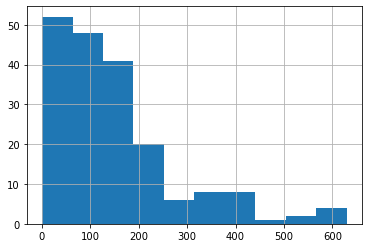

In [236]:
#check for outliers/skewness in our dataset for canceled bookings
print('Canceled bookings skewness:', df[df.is_canceled==1].lead_time.skew())
df[df.is_canceled==1].lead_time.hist()

Canceled bookings skewness: 1.2874546324378804


<AxesSubplot:>

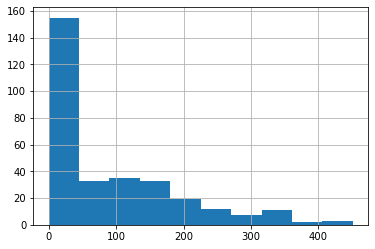

In [237]:
#check for outliers/skewness in our dataset for not canceled bookings
print('Canceled bookings skewness:', df[df.is_canceled==0].lead_time.skew())
df[df.is_canceled==0].lead_time.hist()

In [238]:
#Since skewness is higher than moderate let's remove any outliers using box plot calculations
#Canceled bookings outliers
df.sort_values("lead_time")
q1_canceled, q3_canceled= np.percentile(df[df.is_canceled==1].lead_time,[25,75])
print('Q1:', q1_canceled)
print('Q3:',q3_canceled)

iqr_canceled = q3_canceled - q1_canceled

lower_bound_canceled = q1_canceled -(1.5 * iqr_canceled)
upper_bound_canceled = q3_canceled +(1.5 * iqr_canceled)

print('Lower Bound_canceled:', lower_bound_canceled)
print('Upper Bound_canceled:', upper_bound_canceled)


Q1: 59.0
Q3: 194.5
Lower Bound_canceled: -144.25
Upper Bound_canceled: 397.75


In [239]:
##Since skewness is higher than moderate let's remove any outliers using box plot calculations
#Not Canceled bookings outliers
q1_not_canceled, q3_not_canceled= np.percentile(df[df.is_canceled==0].lead_time,[25,75])
print('Q1:', q1_not_canceled)
print('Q3:',q3_not_canceled)

iqr_not_canceled = q3_not_canceled - q1_not_canceled

lower_bound_not_canceled = q1_not_canceled -(1.5 * iqr_not_canceled)
upper_bound_not_canceled = q3_not_canceled +(1.5 * iqr_not_canceled)

print('Lower Bound_not_canceled:', lower_bound_not_canceled)
print('Upper Bound_not_canceled:', upper_bound_not_canceled)


Q1: 13.0
Q3: 148.5
Lower Bound_not_canceled: -190.25
Upper Bound_not_canceled: 351.75


In [240]:
#canceled_filter = df[df.is_canceled==1]
#df['adr_cleaned']=canceled_filter.adr[df.adr <0]
df1 = df[(df.is_canceled==1) & (df.lead_time>lower_bound_canceled) & (df.lead_time<upper_bound_canceled)]
df2 = df[(df.is_canceled==0) & (df.lead_time>lower_bound_not_canceled) & (df.lead_time<upper_bound_not_canceled)]

df = pd.concat([df1, df2], ignore_index=True)
df

,is_canceled,lead_time,date
0,1,115,2017-06-23
1,1,86,2017-03-09
2,1,125,2017-07-15
3,1,68,2017-04-17
4,1,91,2017-04-21
...,...,...,...
475,0,151,2017-08-31
476,0,24,2017-02-09
477,0,93,2017-04-22
478,0,19,2017-06-12


Canceled bookings skewness: 0.8553812819793639
Not_Canceled bookings skewness: 1.1279369652523028


<AxesSubplot:>

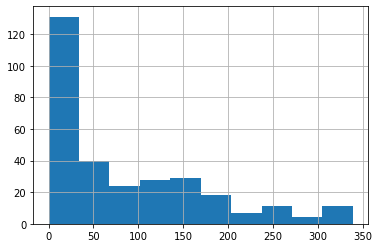

In [241]:
#Now we can see that skewness is lower
print('Canceled bookings skewness:', df[df.is_canceled==1].lead_time.skew())
print('Not_Canceled bookings skewness:', df[df.is_canceled==0].lead_time.skew())

df[df.is_canceled==0].lead_time.hist()

In [242]:
#Below we will perform a ztest to compare means

In [243]:
stats.mannwhitneyu(x = canceled_lead_time, y =not_canceled_lead_time, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=35804.5, pvalue=2.764128765036214e-06)

In [244]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [245]:
import pingouin as pg
pg.mwu(canceled_lead_time, not_canceled_lead_time, tail='greater')

,U-val,tail,p-val,RBC,CLES
MWU,35804.5,greater,0.000001,-0.249198,0.624599


In [246]:
canceled_lead_time.median()

121.0

In [247]:
not_canceled_lead_time.median()

75.0

In [248]:
#We can see that canceled bookings have a greater median than not canceled and reject 
#our null hypthesis at alpha=.05 where X and Y are not equal 
#About 62.5% of 100 bookings canceled lead time was greater than non_canceled lead time
#The probability of canceled bookings having a larger lead time than lead time of non canceled bookings is 62%